In [4]:
#Se cargan las bibliotecas necesarias 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg

In [8]:
import glob

# Obtenemos una lista de rutas de archivos .jpg en la carpeta "data_svm/Pedestrian"
pedestrian = glob.glob("data_svm/Pedestrian/*")
# Obtenemos una lista de rutas de archivos .jpg en la carpeta "data_svm/nonPedestrian"
no_pedestrian = glob.glob("data_svm/nonPedestrian/*")

In [9]:
# Obtenemos la longitud de la lista "pedestrian"
len(pedestrian)

614

In [10]:
# Obtenemos la longitud de la lista "no_pedestrian"
len(no_pedestrian)

1218

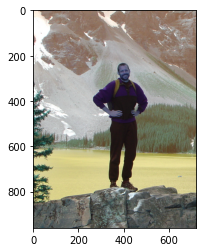

In [11]:
# Leemos una imagen en color utilizando la ruta del archivo en la posición 10 de la lista "pedestrian"
img_color = cv2.imread(pedestrian[10])
# Mostramos la imagen utilizando matplotlib.pyplot.imshow()
plt.imshow(img_color)

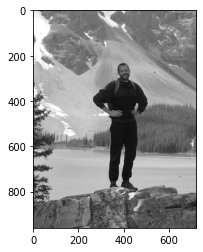

In [12]:
# Convertimos la imagen en color a escala de grises utilizando cv2.cvtColor()
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Mostramos la imagen en escala de grises utilizando plt.imshow()
# Utilizamos el mapa de colores (colormap) 'gray' para representar la imagen en escala de grises
plt.imshow(img_gray, cmap="gray")

In [13]:
# Calculamos el Histogram of Oriented Gradients (HOG) de la imagen en escala de grises
# La función hog() de skimage.feature se encarga de calcular el HOG y devolver las características
# También devuelve la imagen HOG visualizada si se especifica el parámetro "visualize" como True
# Utilizamos otros parámetros para personalizar el cálculo del HOG
features, hog_img = hog(img_gray,
                        orientations=11,
                        pixels_per_cell=(16, 16),
                        cells_per_block=(2, 2),
                        transform_sqrt=False,
                        visualize=True,
                        feature_vector=True)     

In [14]:
# Obtenemos la forma (shape) de las características extraídas
features.shape

(114224,)

In [15]:
# Obtenemos la forma (shape) de la imagen HOG visualizada
hog_img.shape

(960, 720)

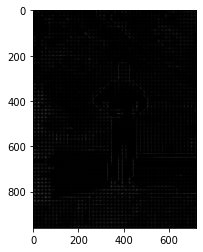

In [16]:
# Mostramos la imagen HOG utilizando plt.imshow()
# Utilizamos el mapa de colores (colormap) 'gray' para representar la imagen en escala de grises
plt.imshow(hog_img, cmap='gray')

In [18]:
# Lista para acumular las características HOG de peatones
pedestrian_hog_accum = []

# Iteramos sobre cada ruta de archivo en la lista "pedestrian"
for i in pedestrian:
    # Cargamos la imagen en color utilizando mpimg.imread()
    img_color = mpimg.imread(i)
    
    # Convertimos la imagen en color a escala de grises utilizando cv2.cvtColor()
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    # Calculamos el Histogram of Oriented Gradients (HOG) de la imagen en escala de grises
    # Utilizamos la función hog() de skimage.feature para realizar el cálculo del HOG y obtener las características
    # También se devuelve la imagen HOG visualizada si se especifica el parámetro "visualize" como True
    # Utilizamos otros parámetros para personalizar el cálculo del HOG
    pedestrian_hog_feature, pedestrian_hog_img = hog(img_gray,
                                                    orientations=11,
                                                    pixels_per_cell=(16, 16),
                                                    cells_per_block=(2, 2),
                                                    transform_sqrt=False,
                                                    visualize=True,
                                                    feature_vector=True)
    
    # Agregamos las características HOG del peatón actual a la lista de acumulación
    pedestrian_hog_accum.append(pedestrian_hog_feature)

In [19]:
# Creamos una matriz de características X_pedestrian utilizando las características HOG acumuladas
X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)

# Creamos un arreglo de etiquetas Y_pedestrian con valor 1 para cada muestra de peatón
Y_pedestrian = np.ones(len(X_pedestrian))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 56760 and the array at index 1 has size 12672

In [ ]:
# Obtenemos la forma (shape) de la matriz de características X_pedestrian
X_pedestrian.shape

In [ ]:
# Obtenemos la forma (shape) de la matriz de características Y_pedestrian
Y_pedestrian.shape

In [ ]:
# Lista para acumular las características HOG de no peatones
nopedestrian_hog_accum = []

# Iteramos sobre cada ruta de archivo en la lista "no_pedestrian"
for i in no_pedestrian:
    # Cargamos la imagen en color utilizando mpimg.imread()
    img_color = mpimg.imread(i)
    
    # Convertimos la imagen en color a escala de grises utilizando cv2.cvtColor()
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    # Calculamos el Histogram of Oriented Gradients (HOG) de la imagen en escala de grises
    # Utilizamos la función hog() de skimage.feature para realizar el cálculo del HOG y obtener las características
    # También se devuelve la imagen HOG visualizada si se especifica el parámetro "visualize" como True
    # Utilizamos otros parámetros para personalizar el cálculo del HOG
    nopedestrian_hog_feature, nonpedestrian_hog_img = hog(img_gray,
                                                        orientations=11,
                                                        pixels_per_cell=(16, 16),
                                                        cells_per_block=(2, 2),
                                                        transform_sqrt=False,
                                                        visualize=True,
                                                        feature_vector=True)
    
    # Agregamos las características HOG de no peatón actual a la lista de acumulación
    nopedestrian_hog_accum.append(nopedestrian_hog_feature)

In [ ]:
# Creamos una matriz de características X_nopedestrian utilizando las características HOG acumuladas
X_nopedestrian = np.vstack(nopedestrian_hog_accum).astype(np.float64)

# Creamos un arreglo de etiquetas Y_nopedestrian con valor 0 para cada muestra de no peatón
Y_nopedestrian = np.zeros(len(X_nopedestrian))

In [ ]:
# Obtenemos la forma (shape) de la matriz de características X_nopedestrian
X_nopedestrian.shape

In [ ]:
# Obtenemos la forma (shape) de la matriz de características Y_nopedestrian
Y_nopedestrian.shape

In [ ]:
# Concatenamos verticalmente las matrices X_pedestrian y X_nopedestrian para formar la matriz X
X = np.vstack((X_pedestrian, X_nopedestrian))

# Obtenemos la forma (shape) de la matriz X
X.shape

In [ ]:
# Concatenamos verticalmente los arreglos Y_pedestrian y Y_nopedestrian para formar el arreglo Y
Y = np.vstack((Y_pedestrian, Y_nopedestrian))

# Obtenemos la forma (shape) del arreglo Y
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Generamos los conjuntos de datos de entrenamiento y prueba
# Utilizamos train_test_split() de sklearn.model_selection para dividir las matrices X e Y en conjuntos de entrenamiento y prueba
# El parámetro test_size=0.2 indica que el 20% de los datos se utilizarán como datos de prueba
# El parámetro random_state=42 se utiliza para fijar una semilla y obtener resultados reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Obtenemos la forma (shape) de X_train
X_train.shape

In [ ]:
# Obtenemos la forma (shape) de X_test
X_test.shape

In [ ]:
from sklearn.svm import SVC

# Creamos una instancia del modelo de clasificación SVC (Support Vector Classifier)
svc_model = SVC()

# Entrenamos el modelo utilizando los conjuntos de datos de entrenamiento X_train y y_train
svc_model.fit(X_train, y_train)

In [ ]:
# Realizamos predicciones en los datos de prueba utilizando el modelo entrenado
y_predict = svc_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculamos la matriz de confusión utilizando las etiquetas reales y las predichas
cm = confusion_matrix(y_test, y_predict)

# Visualizamos la matriz de confusión utilizando un mapa de calor (heatmap) y anotaciones
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# Imprimimos un informe de clasificación que muestra métricas de evaluación detalladas
print(classification_report(y_test, y_predict))

In [ ]:
# Define los hiperparámetros y los posibles valores 
# que se utilizarán en la búsqueda de la mejor combinación de hiperparámetros para el modelo de clasificación.
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Creamos una instancia de GridSearchCV para buscar los mejores hiperparámetros
# Utilizamos SVC() como estimador base, param_grid como el espacio de búsqueda de hiperparámetros
# refit=True indica que se ajustará el modelo final con la mejor combinación de hiperparámetros
# verbose=4 proporciona mensajes detallados durante el proceso de búsqueda
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

# Realizamos la búsqueda de hiperparámetros utilizando los conjuntos de datos de entrenamiento
grid.fit(X_train, y_train)

In [ ]:
# Obtenemos los mejores hiperparámetros encontrados durante la búsqueda
grid.best_params_

In [ ]:
# Obtenemos el mejor estimador (modelo) encontrado durante la búsqueda
grid.best_estimator_

In [ ]:
# Realizamos predicciones en los datos de prueba utilizando el mejor modelo encontrado durante la búsqueda
grid_predictions = grid.predict(X_test)

In [ ]:
# Calculamos la matriz de confusión utilizando las etiquetas reales y las predicciones del mejor modelo
cm = confusion_matrix(y_test, grid_predictions)

# Visualizamos la matriz de confusión utilizando un mapa de calor (heatmap) y anotaciones
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# Imprimimos un informe de clasificación que muestra métricas de evaluación detalladas del mejor modelo
print(classification_report(y_test, grid_predictions))